# Lecture 4: I/O, Visualization, Graphics

Erik Dam (erikdam@di.ku.dk)

Raghavendra Selvan (raghav@di.ku.dk)

Sandeep S Sengar (sengar@di.ku.dk)

# Text Files

Plain text files just with text or with comma separated values (.csv) are commonly encountered when dealing with data processing. Let us look at how to handle these formats.

### Task 1:
Reading and writing plain text files

In [22]:
# The file co2_small.txt is provided in the same directory
# We will open, read and close this file using in-built functions

# open() the file into and assign it to a variable 

f = open("co2_small.txt", "r")

# read() the opened file into a new data variable 
f_contents = f.read()
# print the read contents
print(f_contents)
# close() the file container 
f.close()

year, global_mean
2000,369.124980031739
2001,370.672990098631
2002,372.834994284113
2003,375.410995033953
2004,376.987002498738
2005,378.907004978159
2006,381.010006959774
2007,382.603024683866
2008,384.73901862778
2009,386.28001904393
2010,388.717029278483
2011,390.944014691326
2012,393.015992715853
2013,395.724979344097
2014,397.546976931623



In [23]:
# Another way of reading the file
# This time we do line-by-line

# open() the file as above 

file1 = open("co2_small.txt", "r") 
# readline() by line
Lines = file1.readlines()  
count = 0
# print each line
for line in Lines: 
    print("Line{}: {}".format(count, line.strip())) 
    count+=1 
# close() the file 
f.close()

Line0: year, global_mean
Line1: 2000,369.124980031739
Line2: 2001,370.672990098631
Line3: 2002,372.834994284113
Line4: 2003,375.410995033953
Line5: 2004,376.987002498738
Line6: 2005,378.907004978159
Line7: 2006,381.010006959774
Line8: 2007,382.603024683866
Line9: 2008,384.73901862778
Line10: 2009,386.28001904393
Line11: 2010,388.717029278483
Line12: 2011,390.944014691326
Line13: 2012,393.015992715853
Line14: 2013,395.724979344097
Line15: 2014,397.546976931623


In [24]:
# Finally, a more concise way of looping over each line
# for loop over the object iterator

f = open("co2_small.txt", "r")
for line in f:
    print("Line:", line, end="")

# close() the file 
f.close()

Line: year, global_mean
Line: 2000,369.124980031739
Line: 2001,370.672990098631
Line: 2002,372.834994284113
Line: 2003,375.410995033953
Line: 2004,376.987002498738
Line: 2005,378.907004978159
Line: 2006,381.010006959774
Line: 2007,382.603024683866
Line: 2008,384.73901862778
Line: 2009,386.28001904393
Line: 2010,388.717029278483
Line: 2011,390.944014691326
Line: 2012,393.015992715853
Line: 2013,395.724979344097
Line: 2014,397.546976931623


The last one is quite elegant. How does that work? 

So open() returns a TextIOWrapper object. 
This includes \__iter__() and next() functions meaning that it qualifies to be an "Iterator". 
This is why it fuels the for loop by itself. 
Note that when the next() function returns False, it has internally done close(). 

### Task 2: CSV file handling, and some numpy magic!



In [25]:
# Import the CSV file provided c02.txt
# As all entries are numbers, we can directly
import numpy as np
# load it into a numpy array
data = np.loadtxt("co2.txt", dtype=str)
print('data from file:',data)
# load the csv file 
from numpy import genfromtxt
my_data = genfromtxt('co2.txt', delimiter=',')
# print its shape
print('shape of data using loadtxt',data.shape) 
print('shape of data using genfromtxt:',my_data.shape) 
# print a subset of content
print('subset using loadtxt:',data[1:19])
print('subset using genfromtxt:',my_data[1:19])


data from file: ['0,277.454' '1,277.137' '2,277.16' ... '2012,393.015992715853'
 '2013,395.724979344097' '2014,397.546976931623']
shape of data using loadtxt (2015,)
shape of data using genfromtxt: (2015, 2)
subset using loadtxt: ['1,277.137' '2,277.16' '3,277.158' '4,277.157' '5,277.167' '6,277.172'
 '7,277.171' '8,277.175' '9,277.176' '10,277.179' '11,277.194'
 '12,277.198' '13,277.201' '14,277.201' '15,277.211' '16,277.217'
 '17,277.221' '18,277.226']
subset using genfromtxt: [[  1.    277.137]
 [  2.    277.16 ]
 [  3.    277.158]
 [  4.    277.157]
 [  5.    277.167]
 [  6.    277.172]
 [  7.    277.171]
 [  8.    277.175]
 [  9.    277.176]
 [ 10.    277.179]
 [ 11.    277.194]
 [ 12.    277.198]
 [ 13.    277.201]
 [ 14.    277.201]
 [ 15.    277.211]
 [ 16.    277.217]
 [ 17.    277.221]
 [ 18.    277.226]]


In [26]:
# Create a new array with only average temperature over decades
# generate random temp values
from random import randint
# generate some integers
temp=[]
window_size=10
for i in range(100):
    value = randint(0, 10)
    temp.append(value)
print('temperatures are',temp)
i=0
moving_averages = []
while i < len(temp) - window_size + 1:
    this_window = temp[i : i + window_size]

    window_average = sum(this_window) / window_size
    moving_averages.append(window_average)
    i += 10
print('average temperature over decades:',moving_averages)
# Compute the average over each of the 10 entries
# for each year and save it in the new array

i=0
moving_averages = []
while i < len(temp) - window_size + 1:
    this_window = temp[i : i + window_size]
    window_average = sum(this_window) / window_size
    moving_averages.append(window_average)
    i += 1
print('average (decades) of each years  :',moving_averages)



temperatures are [1, 4, 1, 2, 5, 7, 0, 5, 10, 9, 1, 5, 4, 9, 7, 9, 3, 1, 3, 7, 9, 7, 5, 5, 2, 2, 2, 0, 6, 3, 1, 0, 6, 10, 10, 4, 2, 0, 2, 7, 1, 7, 0, 2, 3, 8, 8, 0, 10, 0, 8, 1, 5, 2, 8, 2, 7, 4, 8, 2, 4, 10, 7, 9, 8, 7, 8, 8, 1, 3, 2, 5, 5, 0, 1, 9, 7, 0, 2, 1, 7, 4, 9, 8, 2, 9, 2, 7, 7, 7, 7, 4, 10, 7, 8, 0, 5, 6, 9, 10]
average temperature over decades: [4.4, 4.9, 4.1, 4.2, 3.9, 4.7, 6.5, 3.2, 6.2, 6.6]
average (decades) of each years  : [4.4, 4.4, 4.5, 4.8, 5.5, 5.7, 5.9, 6.2, 5.8, 5.1, 4.9, 5.7, 5.9, 6.0, 5.6, 5.1, 4.4, 4.3, 4.2, 4.5, 4.1, 3.3, 2.6, 2.7, 3.2, 4.0, 4.2, 4.2, 4.2, 3.8, 4.2, 4.2, 4.9, 4.3, 3.5, 2.8, 3.2, 3.8, 3.8, 4.6, 3.9, 4.6, 4.0, 4.5, 4.5, 5.0, 4.4, 4.3, 4.7, 4.5, 4.7, 4.3, 5.2, 5.4, 6.1, 6.1, 6.6, 6.7, 7.1, 6.4, 6.5, 6.3, 5.8, 5.6, 4.7, 4.0, 4.2, 4.1, 3.3, 3.4, 3.2, 3.7, 3.6, 4.0, 4.8, 4.9, 4.9, 4.4, 5.1, 5.6, 6.2, 6.2, 6.2, 6.3, 6.2, 6.8, 5.9, 6.2, 6.1, 6.3, 6.6]


In [27]:
# Or... we can use some numpy magic in one line!
temp=np.array(temp)
print('Decade wise temp with single line of code:',np.mean(temp.reshape(-1, 10), axis=1))

Decade wise temp with single line of code: [4.4 4.9 4.1 4.2 3.9 4.7 6.5 3.2 6.2 6.6]


## Matplotlib

A versatile plotting package. We will do a quick tour.

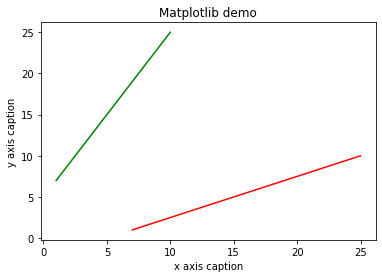

In [28]:
import matplotlib.pyplot as plt
# Create a 1D array
# Use an apt function from plt to plot
#first example
import numpy as np 
x = np.arange(1,11) 
y = 2 * x + 5 

plt.title("Matplotlib demo") # Add title
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") # Add labels
plt.plot(x,y,'g') 
plt.plot(y,x,'r')
plt.show()




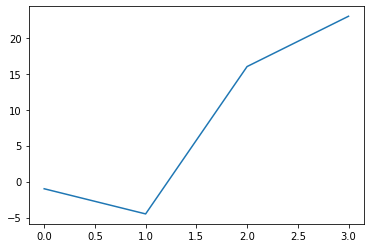

In [29]:
# Continous plot
import matplotlib.pyplot as plt

plt.plot([-1, -4.5, 16, 23])
plt.show()

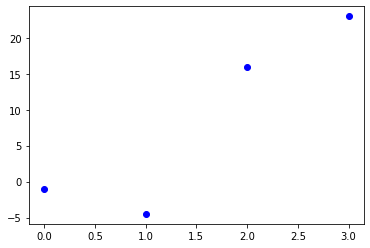

In [30]:
#Discrete plot
plt.plot([-1, -4.5, 16, 23], "ob")
plt.show()

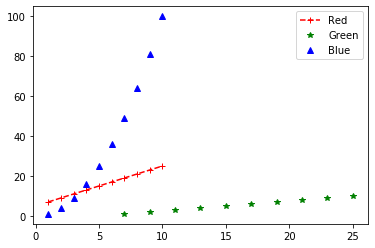

In [31]:
# Add legends
# Save plot
pr, = plt.plot(x,y,'r+--')
pg, = plt.plot(y,x,'g*')
pb, = plt.plot(x,x*x,'b^')
plt.legend([pr,pg,pb],('Red','Green','Blue'))
plt.savefig('example-plot.png')

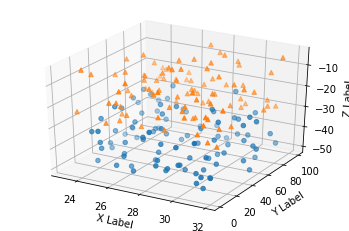

In [32]:
# Should we give 3d plotting a try?

from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
import numpy as np

# Create some 3D data

def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin
# Create pyplot figure

fig = plt.figure()


# Pass the figure as a 3d object
ax = fig.add_subplot(111, projection='3d')

# Use the 3d plot function

n = 100
# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

## Images

Matplotlib also has functionality for handling images. Simple example:

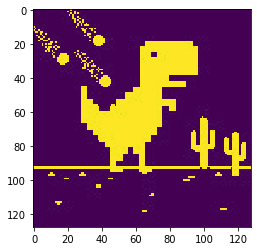

In [33]:
# Load the mpl image library
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Read image
img = mpimg.imread('trex.jpg')
# Show image
#im.show()
imgplot = plt.imshow(img)

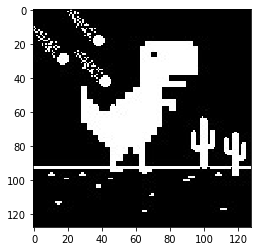

In [35]:
# Show a gray scale image
imgplot = plt.imshow(img, cmap='gray', vmin = 0, vmax = 255)
plt.show()